# NMF ALS - Test Functions
For testing the various functions of the NMF ALS program - WIP

Author:         Benji Lawrence

Last Modified:  05 August 2025

## Program imports & loading cortical thickness matrix
Change `reset=True` in loading for full process

In [1]:
import os
import sys

# set directory to project root
os.chdir("/home/benji/cortical-thickness/nmf-als")

# Core imports
import numpy as np
import matplotlib.pyplot as plt
from src.data.load_ct_matrix import load_ct_matrix
from src.models.nmf_runner import run_nmf
# from src.models.opnmf_runner import run_opnmf
from src.visual.plot_to_brain import visualize_ct

# load and output results
T, labels, filenames = load_ct_matrix(reset=False, hemisphere="bh")
print("T shape:", T.shape)
print("Sample filenames:", filenames[:3])
print("Sample labels:", list(labels.items())[:3])


T shape: (200, 20484)
Sample filenames: ['1010_m48_AD', '1066_m72_AD', '1078_m96_AD']
Sample labels: [('1010_m48_AD', 1), ('1066_m72_AD', 1), ('1078_m96_AD', 1)]


## Running NMF
Testing NMF with standard input states (rank 2 selected for now)

In [2]:
W, H, V = run_nmf(T, 2, max_iter=1000)
print("W shape:", W.shape)
print("H shape:", H.shape)

abs_error = np.linalg.norm(T - V, 'fro')
rel_error = abs_error / np.linalg.norm(T, 'fro')

print(f"Absolute Error: {abs_error}")
print(f"Relative Error: {rel_error:.4f}")


W shape: (200, 2)
H shape: (2, 20484)
Absolute Error: 1032.19382970901
Relative Error: 0.2312


/home/benji/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


## Visualization
Using standard file data:

In [3]:
import os

lh_path = "./data/raw/subjects/fsa_results/1066_m72_AD.lh.fsaverage5.thickness.mgh"
rh_path = "./data/raw/subjects/fsa_results/1066_m72_AD.rh.fsaverage5.thickness.mgh"

print("LH exists:", os.path.exists(lh_path))
print("RH exists:", os.path.exists(rh_path))


LH exists: True
RH exists: True


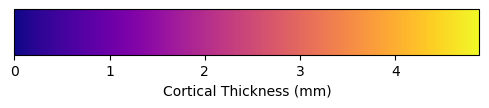

In [9]:

from src.visual.plot_to_brain import visualize_ct
meshes = visualize_ct(
    subject_id="1066_m72_AD",
    data_dir="./data/raw/subjects/fsa_results",
    hemi="rh",
    surface="inflated",
    cmap_name="plasma"
)

# Trigger the mesh view
i=0
for mesh in meshes:
    mesh.show()
    mesh.export(f"./results/brain{i}.ply")
    i += 1

Using results from resulting NMF H matrix:

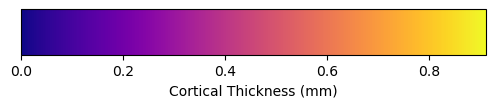

In [13]:
from src.visual.plot_to_brain import visualize_ct

for row in range(0,1):
    # H is your factor matrix from NMF
    meshes = visualize_ct(
        H_row=H[0],  # plot the first component
        hemi="bh",   # both hemispheres
        surface="inflated",
        cmap_name="plasma"
    )

    i=0
    for mesh in meshes:
        mesh.show()
        mesh.export(f"./results/nmf_brain{row}_{i}.ply")
        i += 1